# Taller 3
Finanzas computacionales

Juan David Velasquez

Ricardo Aguilera

Nicolas Lopez

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import cvxpy as cp
from pandas.io.pytables import IndexCol

#1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la informaciónhistórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y con cierre a Dic-2022:

a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un
DataFrame donde se resuman los caculos de: retornos esperados (promedio),
volatilidades, betas, retornos estimados (CAPM) y el coeficiente de determinación de cada
uno.

In [ ]:
precios1 = yf.download("MMM", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos1 = np.log(precios1/precios1.shift()).dropna()
precios2 = yf.download("AXP", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos2 = np.log(precios2/precios2.shift()).dropna()
precios3 = yf.download("AAPL", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos3 = np.log(precios3/precios3.shift()).dropna()
precios4 = yf.download("KO", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos4 = np.log(precios4/precios4.shift()).dropna()
precios5 = yf.download("V", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos5 = np.log(precios5/precios5.shift()).dropna()
indice = yf.download(["^DJI"], start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
r_indice = np.log(indice/indice.shift()).dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


3M

In [ ]:
import statsmodels.api as sm
X = r_indice
Y = retornos1
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     100.2
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.98e-14
Time:                        22:49:08   Log-Likelihood:                 105.46
No. Observations:                  60   AIC:                            -206.9
Df Residuals:                      58   BIC:                            -202.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0135      0.006     -2.449      0.0

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos1)
beta, intercept, r**2, p, std_err**2

(1.0318078020610826,
 -0.013473166521758409,
 0.6334365259914321,
 2.9766887786084084e-14,
 0.01062223014124969)

In [ ]:
r3m = retornos1.mean()
v3m = retornos1.std()
b3m = 1.0318*r_indice.mean()
a3m = 1.0318
r2_3m = 0.613

American Express

In [ ]:
X = r_indice
Y = retornos2
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     97.35
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           5.10e-14
Time:                        22:49:08   Log-Likelihood:                 93.346
No. Observations:                  60   AIC:                            -182.7
Df Residuals:                      58   BIC:                            -178.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.007      0.256      0.7

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos2)
beta, intercept, r**2, p, std_err**2

(1.2443905072856687,
 0.0017230452997949366,
 0.6266450731952639,
 5.095233074442015e-14,
 0.015906903358268366)

In [ ]:
raxp = retornos2.mean()
vaxp = retornos2.std()
baxp = 1.2444*r_indice.mean()
aaxp = 1.2444
r2_axp = 0.62

Apple

In [ ]:
X = r_indice
Y = retornos3
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     38.48
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           6.29e-08
Time:                        22:49:08   Log-Likelihood:                 73.718
No. Observations:                  60   AIC:                            -143.4
Df Residuals:                      58   BIC:                            -139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.009      1.524      0.1

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos3)
beta, intercept, r**2, p, std_err**2

(1.085104280064486,
 0.014233863546783812,
 0.3988210897688203,
 6.29152186916803e-08,
 0.030601349599603585)

In [ ]:
raapl = retornos3.mean()
vaapl = retornos3.std()
baapl = 1.085*r_indice.mean()
aaapl = 1.085
r2_aapl = 0.374

Coca cola

In [ ]:
X = r_indice
Y = retornos4
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     43.40
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.44e-08
Time:                        22:49:08   Log-Likelihood:                 103.96
No. Observations:                  60   AIC:                            -203.9
Df Residuals:                      58   BIC:                            -199.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.006      0.832      0.4

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos4)
beta, intercept, r**2, p, std_err**2

(0.6961030019660333,
 0.00469266480097031,
 0.4279933070064119,
 1.439015494292888e-08,
 0.011165627952162959)

In [ ]:
rko = retornos4.mean()
vko = retornos4.std()
bko = 0.6961*r_indice.mean()
ako = 0.6961
r2_ko = 0.408

Visa

In [ ]:
X = r_indice
Y = retornos5
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     92.76
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.23e-13
Time:                        22:49:08   Log-Likelihood:                 105.36
No. Observations:                  60   AIC:                            -206.7
Df Residuals:                      58   BIC:                            -202.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.006      1.032      0.3

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos5)
beta, intercept, r**2, p, std_err**2

(0.9943186164721145,
 0.005685521999526221,
 0.615269842943985,
 1.2272533423762353e-13,
 0.010658933402454832)

In [ ]:
rv = retornos5.mean()
vv = retornos5.std()
bv = 0.9943*r_indice.mean()
av = 0.9943
r2_v = 0.604

In [ ]:
datos1 = {
    'Retornos esperados' : [r3m,raxp,raapl,rko,rv],
    'Volatilidades': [v3m, vaxp, vaapl, vko, vv],
    'Retornos CAPM': [b3m, baxp, baapl, bko, bv],
    'Betas': [a3m, aaxp, aaapl, ako, av],
    'Coeficiente de determinacion': [r2_3m, r2_axp, r2_aapl, r2_ko, r2_v]
}

df1 = pd.DataFrame(datos1)
df1

,Retornos esperados,Volatilidades,Retornos CAPM,Betas,Coeficiente de determinacion
0,-0.008428,0.069501,0.005045,1.0318,0.613
1,0.007808,0.084273,0.006085,1.2444,0.620
2,0.019540,0.092114,0.005305,1.0850,0.374
3,0.008096,0.057042,0.003404,0.6961,0.408
4,0.010547,0.067957,0.004862,0.9943,0.604


b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del CAPM y las betas de los activos.

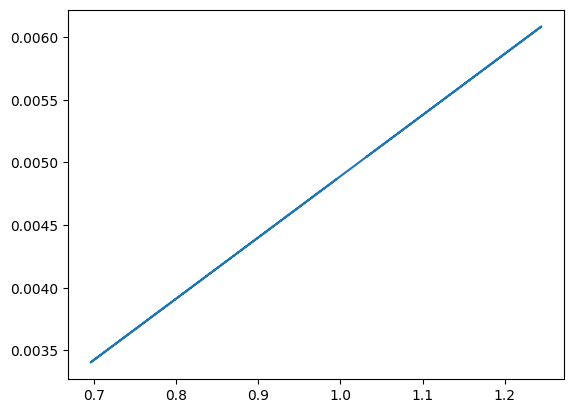

In [ ]:
import seaborn as sb
plt.plot(df1['Betas'],df1['Retornos CAPM']);

c. Punto opcional: estime los retornos de los cinco activos usando el modelo de Fama-French. Compare los resultados con el modelo CAPM.

3M

In [ ]:
#Fama-french
datos = pd.read_csv("datos.csv",sep=";")
factores = pd.concat([datos['Mkt-RF'],datos['SMB'],datos['HML']], axis=1)/100
factores.index = retornos1.index
import statsmodels.api as sm
X = factores
Y = retornos1
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     26.06
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.10e-10
Time:                        23:39:23   Log-Likelihood:                 101.57
No. Observations:                  60   AIC:                            -195.1
Df Residuals:                      56   BIC:                            -186.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0155      0.006     -2.580      0.0

In [ ]:
fm3m = (0.9430*r3m)+(-0.1242*r3m)+(0.1962*r3m)

American Express

In [ ]:
X = factores
Y = retornos2
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     35.17
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           6.50e-13
Time:                        23:39:32   Log-Likelihood:                 95.566
No. Observations:                  60   AIC:                            -183.1
Df Residuals:                      56   BIC:                            -174.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.007     -0.069      0.9

In [ ]:
fmaxp = (1.1202*raxp)+(-0.0878*raxp)+(0.5710*raxp)

Apple

In [ ]:
X = factores
Y = retornos3
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     24.59
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.79e-10
Time:                        23:39:37   Log-Likelihood:                 83.664
No. Observations:                  60   AIC:                            -159.3
Df Residuals:                      56   BIC:                            -151.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.008      1.223      0.2

In [ ]:
fmaapl = (1.2324*raapl)+(-0.2424*raapl)+(-0.4620*raapl)

Coca Cola

In [ ]:
X = factores
Y = retornos4
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     17.28
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           4.58e-08
Time:                        23:39:42   Log-Likelihood:                 106.87
No. Observations:                  60   AIC:                            -205.7
Df Residuals:                      56   BIC:                            -197.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.006      0.522      0.6

In [ ]:
fmko = (0.6387*rko)+(-0.7569*rko)+(0.3269*rko)

Visa

In [ ]:
X = factores
Y = retornos5
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     24.75
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.52e-10
Time:                        23:39:48   Log-Likelihood:                 102.02
No. Observations:                  60   AIC:                            -196.0
Df Residuals:                      56   BIC:                            -187.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.006      0.501      0.6

In [ ]:
fmv = (0.9574*rv)+(-0.4911*rv)+(-0.0063*rv)

In [ ]:
Df2 = pd.DataFrame({'Fama-French':[fm3m,fmaxp,fmaapl,fmko,fmv],
                    'CAPM':[b3m, baxp, baapl, bko, bv]}) 
Df2

,Fama-French,CAPM
0,-0.008554,0.005045
1,0.012519,0.006085
2,0.010317,0.005305
3,0.001690,0.003404
4,0.004852,0.004862


#2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).

a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:
tomar solo posiciones largas en el portafolio.

In [ ]:
precios = yf.download(["BA","CVX","GS","HD","MCD"], start="2017-01-01",end="2022-12-31",interval="1Mo")['Adj Close'].dropna()
retornos = np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  5 of 5 completed


In [ ]:
mu = retornos.mean()
cov = retornos.cov()
sigma = retornos.std()

In [ ]:
n = len(mu)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ mu == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/x.value.sum()
wpt

array([ 2.44394334e-22, -4.69994336e-21,  4.92521187e-21,  2.84666075e-01,
        7.15333925e-01])

a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:
tomar solo posiciones largas en el portafolio.

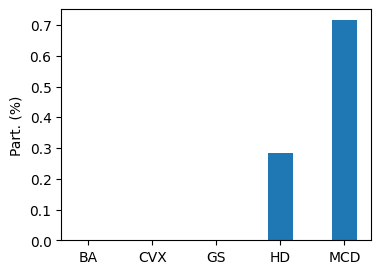

In [ ]:
activos = ["BA","CVX","GS","HD","MCD"]
plt.figure(figsize = (4, 3))
plt.bar(activos, x.value/x.value.sum(), width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

In [ ]:
retornospt = retornos @ wpt
rpt = retornospt.mean()
sigmapt = retornospt.std()
sigmapt
rpt

0.013057298659123338

In [ ]:
alpha = 0.05
np.percentile(retornospt, 100 * (alpha))

-0.07661969529539954

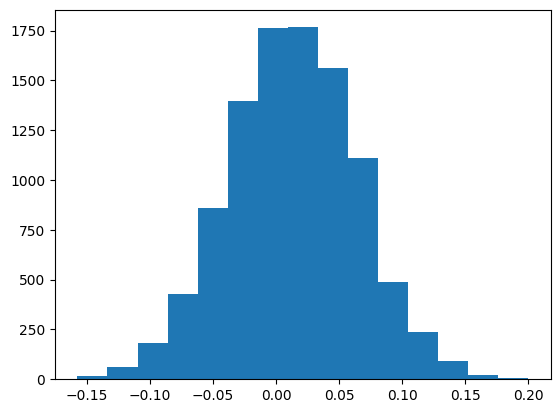

In [ ]:
rands = np.random.normal(rpt,sigmapt, 10000);
VaR = plt.hist(rands,bins = "sturges"); 

In [ ]:
np.percentile(rands, 100 * (alpha))

-0.0706900465930118

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo estándar o paramétrico.


In [ ]:
from scipy.stats import norm
rp = retornospt.mean()
sigmap = retornospt.std()

alpha = 0.05
 
VaRp5pc = rp - norm.ppf(1-alpha)*sigmap 
VaRp5pc

-0.0708758528852371

In [ ]:
rp = retornospt.mean()
sigmap = retornospt.std()

alpha = 0.01
 
VaRp1pc = rp - norm.ppf(1-alpha)*sigmap 
VaRp1pc

-0.10565095930219814

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo de estimación histórica.

In [ ]:
Varh5pc= np.percentile(retornospt, 5)
Varh5pc

-0.07661969529539954

In [ ]:
Varh1pc= np.percentile(retornospt, 1)
Varh1pc

-0.10652901520836967


d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000
portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

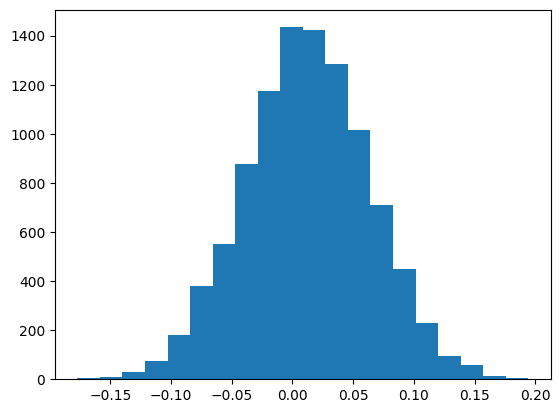

In [ ]:
rands = np.random.normal(rp,sigmap, 10000);
plt.hist(rands,bins=20); 

In [ ]:
Var5pc = np.percentile(rands, 5)
Var5pc

-0.07239452231373597

In [ ]:
Var1pc = np.percentile(rands, 1)
Var1pc

-0.10557808212987267

In [ ]:
Df1=pd.DataFrame({'Var al 5%':[VaRp5pc,Varh5pc,Var5pc],'Var al 1%':[VaRp1pc,Varh1pc,Var1pc]}) 
Df1

,Var al 5%,Var al 1%
0,-0.070876,-0.105651
1,-0.076620,-0.106529
2,-0.072395,-0.105578


#3. Los precios de activos riesgos en el mercado describen un proceso estocástico {St} t≥0 que satisface:

St = S0 exp{(μ– 1/2σ
2
)dt + σ dWt
}

Donde: μ es la tasa de retorno del activo, σ es su volatilidad y Wt es un proceso estándar de
Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de
tiempo t.

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente
gráficamente las primeras 20 trayectorias del proceso.
Nota: tome como S0 el precio de Dic-2022 y los parámetros estimados a partir de la muestra
de datos.

In [153]:
activop3 = ["T"]
precio = yf.download(activop3, start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retorno = np.log(precio/precio.shift()).dropna()
mup3 = retorno.mean()
sigmap3 = retorno.std()

[*********************100%***********************]  1 of 1 completed


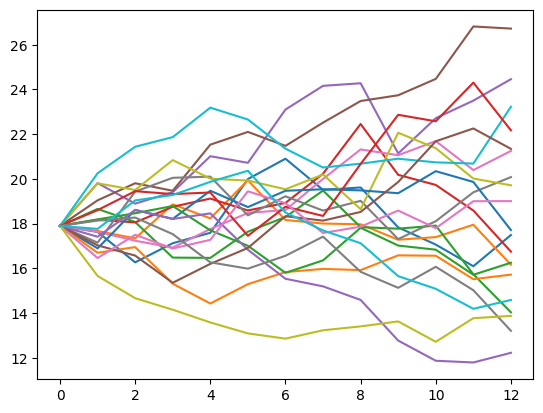

In [155]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S
T = 1 
mu = mup3*12
sigma = sigmap3*np.sqrt(12)
S0 = precio.tail(1)
NS = 20
M = 12 # Partición del año en meses
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St));


b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué puede
concluir de la forma de los histogramas?

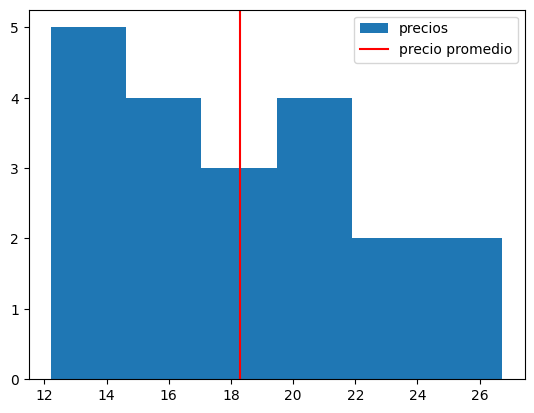

In [169]:
plt.hist(St[:,-1], bins= "sturges", label='precios')
plt.axvline(St[:,-1].mean(), color='r', label='precio promedio')
plt.legend();

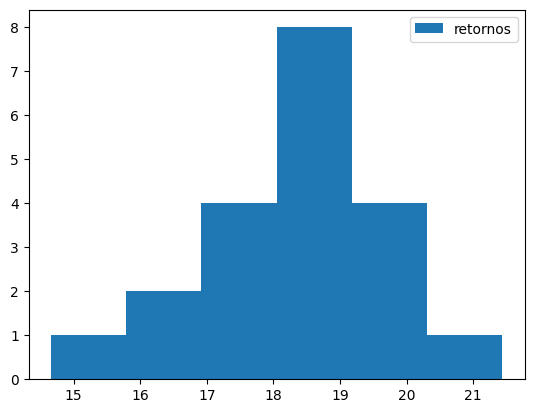

In [168]:
plt.hist(St[:,2], bins= "sturges", label='retornos')
plt.legend();

c. Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

In [162]:
S0*np.exp(mup3*T), St[:,-1].mean()

(Date
 2022-12-01    17.87791
 Name: Adj Close, dtype: float64,
 18.295652036311285)

d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [160]:
rands = np.random.normal(mup3,sigmap3, 100);
prop = norm.cdf(S0, loc=np.mean(rands), scale=np.std(rands))
prop

array([1.])

In [159]:
St
St[:,-1]

array([17.48765204, 16.15927903, 14.02897681, 16.74428592, 24.45701183,
       26.72007195, 21.24769146, 20.07699472, 19.71087785, 23.22306474,
       17.70757197, 15.71515086, 16.24736452, 22.16914269, 12.21819963,
       21.34098079, 19.00276597, 13.20304286, 13.86988419, 14.58303088])

#4.Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso Xt que satisface: Xt+dt = Xt + (μ–Xt)dt + σ(Wt+dt − Wt)


In [ ]:
def PathsOU(X0,mu,sigma,T,NS,M):
    Z = np.random.normal(0.0,1.0,[NS,M])
    X = np.zeros([NS, M+1])
    X[:,0] = X0
    dt = T / M
    k=1
    std_dt = np.sqrt( sigma*2 /(2*k) * (1-np.exp(-2*k*dt)) )
    for t in range(0,M):
         X[:,t+1] = mu + np.exp(-k*dt)(X[:,t]-mu) + std_dt * Z[:,t]
    return X

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles
trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ = 0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras
10 trayectorias del proceso.

In [138]:
def or_uh(x0, mu, sigma, k, T, dt, ns):

    steps = int(T/dt)
    y = np.zeros((ns, steps))
    for i in range(ns):
        x = np.zeros(steps)
        x[0] = x0
        for j in range(1, steps):
            x[j] = x[j-1] + k*(mu-x[j-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        y[i] = x
    return y

In [139]:

x0 = 1               
mu = 3                
sigma = 0.3          
k = 1                
T = 5                
dt = T/252           
ns = 100    

In [136]:
y = or_uh(x0, mu, sigma, k, T, dt, ns)

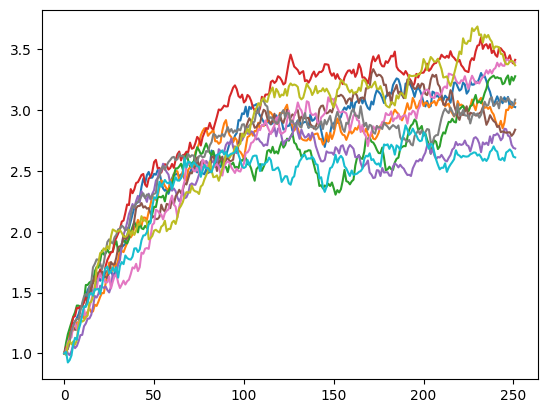

In [137]:
plt.plot(np.transpose(y[:10]))
plt.show()

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede
concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo
plazo?

El valor esperado va a ser mucho mayor, pero tambien su varianza va a crecer a lo largo del tiempo.

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso
Ornstein-Uhlenbeck?


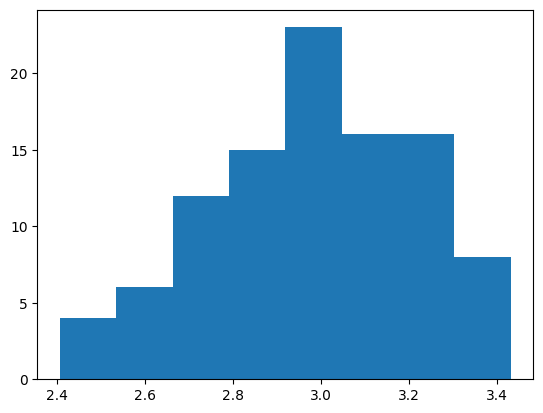

In [163]:
p = y[:,-1]
plt.hist(p, bins='sturges')
plt.show;

#5. Escoja tres de los siguientes activos.
i. Gold futures (GC=F)
ii. Brent Oil futures (BZ=F)
iii. US Treasury Bill (^IRX)
iv. EURUSD currency (EURUSD=X)
v. GBPUSD currency (GBPUSD=X)
vi. Coffee futures (KC=F)
vii. Natural gas (NG=F)
viii. Cooper (HG=F)

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso
estocástico tipo MGB o de reversión a la media tipo OU.
La selección del proceso debe incorporar:

a. La gráfica de las series históricas de los precios

[*********************100%***********************]  3 of 3 completed


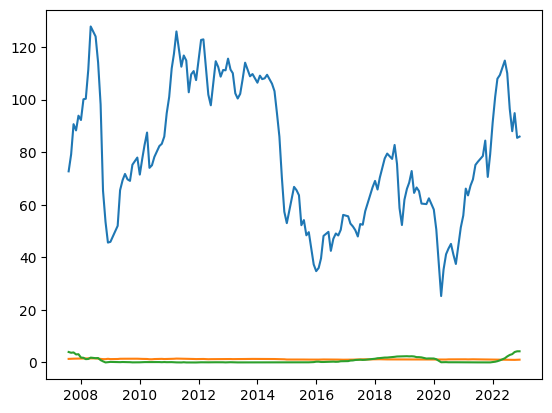

In [ ]:
#^IRX, EURUSD=X, BZ=F
p = yf.download(["BZ=F","^IRX","EURUSD=X"], start='2005-01-01', end='2022-12-31', interval='1Mo')['Adj Close'].dropna()
r = np.log(p/p.shift()).dropna()
plt.plot(p);

b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
pruebadf1 = adfuller(p['BZ=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -2.497247
P-value: 0.116146
Citical values:
	1%: -3.472703
	5%: -2.880132
	10%: -2.576683


In [ ]:
pruebadf1 = adfuller(p['^IRX'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -2.288613
P-value: 0.175667
Citical values:
	1%: -3.473543
	5%: -2.880498
	10%: -2.576878


In [ ]:
pruebadf1 = adfuller(p['EURUSD=X'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.592848
P-value: 0.487185
Citical values:
	1%: -3.472431
	5%: -2.880013
	10%: -2.576619


c. Los resultados de la simulación

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M]) #el choque con normal estandar, NS es # trayectorias y M es la particion
    S = np.zeros([NS, M+1])
    S[:,0] = S0 #S0 es el precio inicial
    dt = T / M 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

Text(0.5, 0, 'Tiempo')

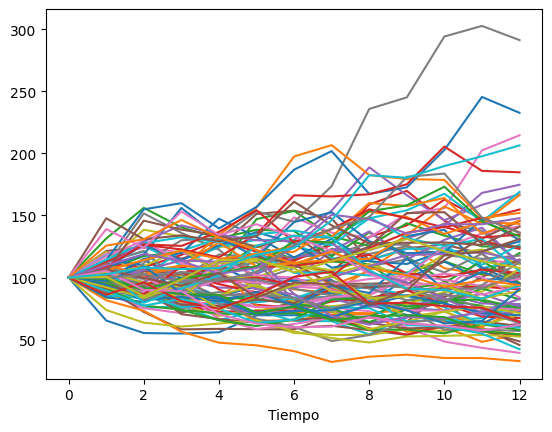

In [ ]:
# Brend Oil Futures
T = 1 
mu = r['BZ=F'].mean()
sigma = r['BZ=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

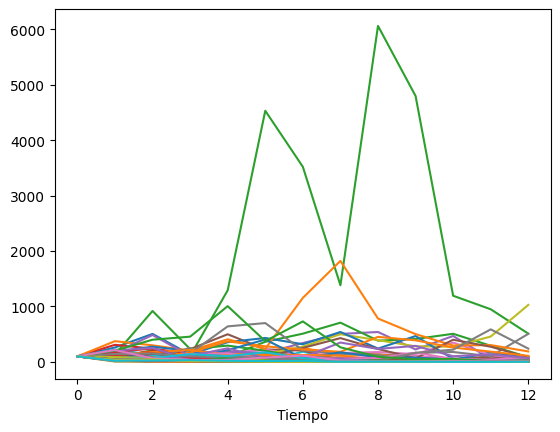

In [ ]:
# USD Treasury Bills
T = 1 
mu = r['^IRX'].mean()
sigma = r['^IRX'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

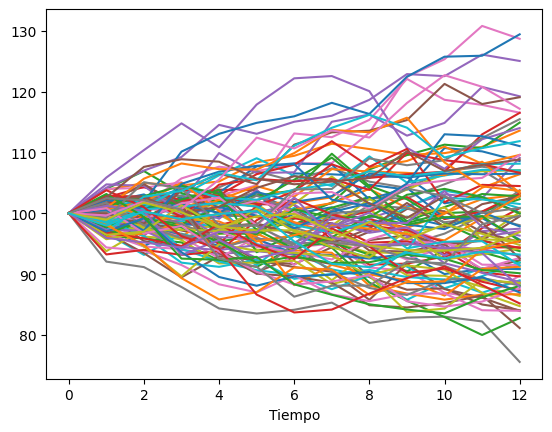

In [ ]:
# EURUSD Currency
T = 1 
mu = r['EURUSD=X'].mean()
sigma = r['EURUSD=X'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")